In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import PowerTransformer
import warnings


In [90]:
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
#pd.set_option('display.max_rows', None)

In [91]:
df = pd.read_excel(r"data/trainDataset.xls")

In [92]:
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670

### Target Variable counts

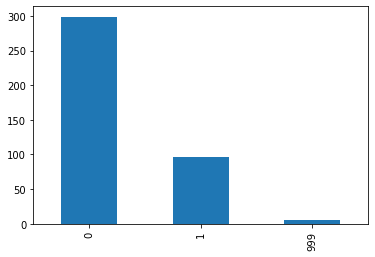

In [93]:
df['pCR (outcome)'].value_counts().plot(kind='bar')
plt.show()

### Targel Label Counts

In [94]:
df['pCR (outcome)'].value_counts()

0      299
1       96
999      5
Name: pCR (outcome), dtype: int64

### Targel Label Counts Percentages

In [95]:
df['pCR (outcome)'].value_counts()/df['pCR (outcome)'].shape[0]

0      0.7475
1      0.2400
999    0.0125
Name: pCR (outcome), dtype: float64

## Taking only `pCR (outcome)` 0 and 1

In [96]:
df = df[df['pCR (outcome)']!=999]

### Replacing 999 values with Mode

In [97]:
df.replace({999:None}).isnull().sum().sort_values(ascending=False).head(10)

HistologyType                                         3
ChemoGrade                                            3
Proliferation                                         2
PgR                                                   1
HER2                                                  1
TrippleNegative                                       1
LNStatus                                              1
original_glrlm_GrayLevelVariance                      0
original_gldm_SmallDependenceEmphasis                 0
original_gldm_SmallDependenceHighGrayLevelEmphasis    0
dtype: int64

In [98]:
df['HistologyType'] = df['HistologyType'].replace({999:None}).fillna(int(df['HistologyType'].mode()))
df['ChemoGrade'] = df['ChemoGrade'].replace({999:None}).fillna(int(df['ChemoGrade'].mode()))
df['Proliferation'] = df['Proliferation'].replace({999:None}).fillna(int(df['Proliferation'].mode()))
df['PgR'] = df['PgR'].replace({999:None}).fillna(int(df['PgR'].mode()))
df['HER2'] = df['HER2'].replace({999:None}).fillna(int(df['HER2'].mode()))
df['TrippleNegative'] = df['TrippleNegative'].replace({999:None}).fillna(int(df['TrippleNegative'].mode()))
df['LNStatus'] = df['LNStatus'].replace({999:None}).fillna(int(df['LNStatus'].mode()))

## Exploring importance of different features

#### Age

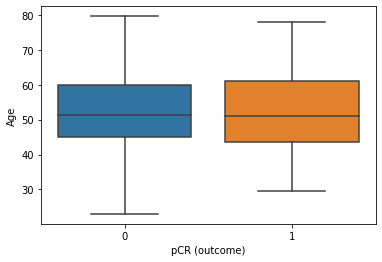

In [99]:
sns.boxplot(y='Age', x='pCR (outcome)',data=df)
plt.show()

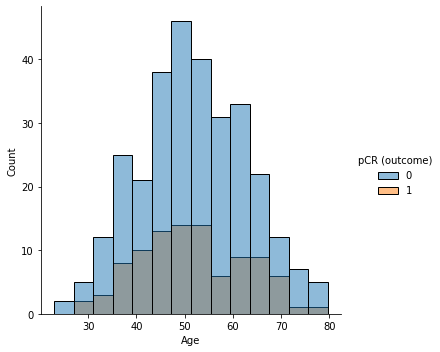

In [100]:
### Age
sns.displot(x=df['Age'],hue=df['pCR (outcome)'])
plt.show()

### T- test to find out significance of `Age` with repective to `pCR outcome`

In [101]:

st.ttest_1samp(a=df[df['pCR (outcome)']==0]['Age'].to_list(),popmean=df['Age'].mean())

Ttest_1sampResult(statistic=-0.005236279523801493, pvalue=0.9958255760644659)

In [102]:

st.ttest_1samp(a=df[df['pCR (outcome)']==1]['Age'].to_list(),popmean=df['Age'].mean())

Ttest_1sampResult(statistic=0.009385560849441685, pvalue=0.9925311972673878)

#### Conclusion:

**`Age` is not signofocant feature on 'pCR (outcome)'**

### Categorical variables using chisqure test

- alpha value 10%

In [103]:
def chiaSquare2(var1, var2 , df):
    #print(f"var1:{var1}")
    #print(f"var2:{var2}")
    tmp = df.groupby([var1, var2],as_index=False).agg({'ID':'count'}).rename(columns={'ID':'count'})
    var1_cats = list(df[var1].unique())
    var1_cats.sort()
    #print(f"var1 categories: {var1_cats}")
    
    pcr_cats = list(df[var2].unique())
    pcr_cats.sort()
    #print(f"var2 categories: {pcr_cats}")    
    
    observed = []  
    
    for pcr_cat in pcr_cats:
        observed.append( tmp[tmp['pCR (outcome)']==pcr_cat]['count'].to_list() )
        
    #print(f"observed: {observed}")        
    stat, p, dof, expected = st.chi2_contingency(observed)    

    return stat, p, dof, list(expected)

In [104]:
cols = ['ER','PgR','HER2','TrippleNegative','ChemoGrade','Proliferation','HistologyType',
        'LNStatus','TumourStage']
alpha = 0.1
significant_categorical_cols = []


for col in cols:
    stat, p, dof, expected = chiaSquare2(col,'pCR (outcome)',df)     
    if p < alpha:
        status = 'significant'
        significant_categorical_cols.append(col)
    else:
        status='Not significant'
    print(f"{col}: {status}")
    print(f"P-Value: {p}")    
    print("\n")
    print(significant_categorical_cols)

ER: significant
P-Value: 1.3125384834156194e-05


['ER']
PgR: significant
P-Value: 4.1190801418336374e-05


['ER', 'PgR']
HER2: significant
P-Value: 1.1389735121621171e-05


['ER', 'PgR', 'HER2']
TrippleNegative: Not significant
P-Value: 0.15831013145498024


['ER', 'PgR', 'HER2']
ChemoGrade: significant
P-Value: 0.0957964916831371


['ER', 'PgR', 'HER2', 'ChemoGrade']
Proliferation: significant
P-Value: 0.007028022910869786


['ER', 'PgR', 'HER2', 'ChemoGrade', 'Proliferation']
HistologyType: Not significant
P-Value: 0.1900770113619007


['ER', 'PgR', 'HER2', 'ChemoGrade', 'Proliferation']
LNStatus: significant
P-Value: 0.003168748627998413


['ER', 'PgR', 'HER2', 'ChemoGrade', 'Proliferation', 'LNStatus']
TumourStage: significant
P-Value: 0.066318188061944


['ER', 'PgR', 'HER2', 'ChemoGrade', 'Proliferation', 'LNStatus', 'TumourStage']


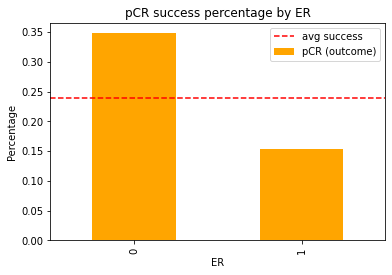

In [105]:
df.groupby('ER',as_index=False).mean()['pCR (outcome)'].plot(kind='bar',color='orange')
plt.axhline(y = 0.24, color = 'r', linestyle = '--', label='avg success')
plt.title("pCR success percentage by ER")
plt.xlabel("ER")
plt.ylabel("Percentage")
plt.legend()
plt.show()

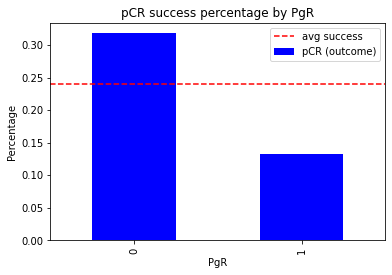

In [106]:
df.groupby('PgR',as_index=False).mean()['pCR (outcome)'].plot(kind='bar',color='blue')
plt.axhline(y = 0.24, color = 'r', linestyle = '--', label='avg success')
plt.title("pCR success percentage by PgR")
plt.xlabel("PgR")
plt.ylabel("Percentage")
plt.legend()
plt.show()

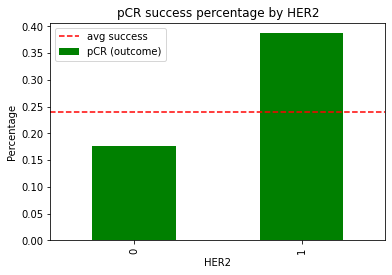

In [107]:
df.groupby('HER2',as_index=False).mean()['pCR (outcome)'].plot(kind='bar',color='green')
plt.axhline(y = 0.24, color = 'r', linestyle = '--', label='avg success')
plt.title("pCR success percentage by HER2")
plt.xlabel("HER2")
plt.ylabel("Percentage")
plt.legend()
plt.show()

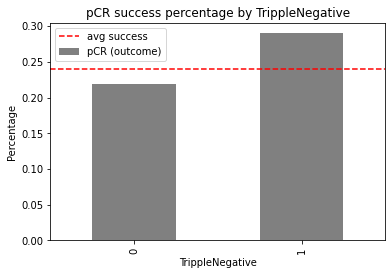

In [108]:
df.groupby('TrippleNegative',as_index=False).mean()['pCR (outcome)'].plot(kind='bar',color='grey')
plt.axhline(y = 0.24, color = 'r', linestyle = '--', label='avg success')
plt.title("pCR success percentage by TrippleNegative")
plt.xlabel("TrippleNegative")
plt.ylabel("Percentage")
plt.legend()
plt.show()

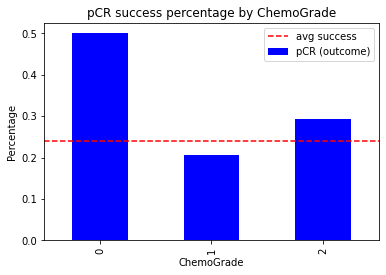

In [109]:
df.groupby('ChemoGrade',as_index=False).mean()['pCR (outcome)'].plot(kind='bar',color='blue')
plt.axhline(y = 0.24, color = 'r', linestyle = '--', label='avg success')
plt.title("pCR success percentage by ChemoGrade")
plt.xlabel("ChemoGrade")
plt.ylabel("Percentage")
plt.legend()
plt.show()

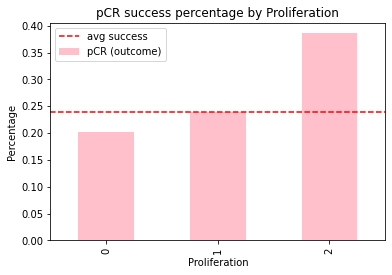

In [110]:
df.groupby('Proliferation',as_index=False).mean()['pCR (outcome)'].plot(kind='bar',color='pink')
plt.axhline(y = 0.24, color = 'r', linestyle = '--', label='avg success')
plt.title("pCR success percentage by Proliferation")
plt.xlabel("Proliferation")
plt.ylabel("Percentage")
plt.legend()
plt.show()

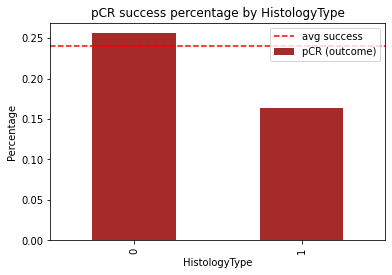

In [111]:
df.groupby('HistologyType',as_index=False).mean()['pCR (outcome)'].plot(kind='bar',color='brown')
plt.axhline(y = 0.24, color = 'r', linestyle = '--', label='avg success')
plt.title("pCR success percentage by HistologyType")
plt.xlabel("HistologyType")
plt.ylabel("Percentage")
plt.legend()
plt.show()

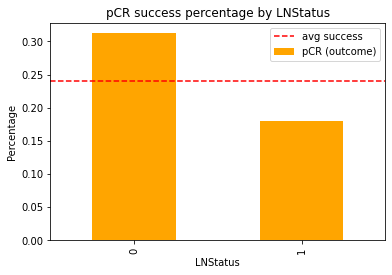

In [112]:
df.groupby('LNStatus',as_index=False).mean()['pCR (outcome)'].plot(kind='bar',color='orange')
plt.axhline(y = 0.24, color = 'r', linestyle = '--', label='avg success')
plt.title("pCR success percentage by LNStatus")
plt.xlabel("LNStatus")
plt.ylabel("Percentage")
plt.legend()
plt.show()

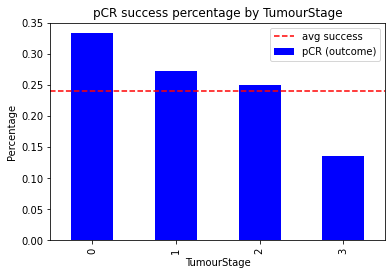

In [113]:
df.groupby('TumourStage',as_index=False).mean()['pCR (outcome)'].plot(kind='bar',color='blue')
plt.axhline(y = 0.24, color = 'r', linestyle = '--', label='avg success')
plt.title("pCR success percentage by TumourStage")
plt.xlabel("TumourStage")
plt.ylabel("Percentage")
plt.legend()
plt.show()

### Conclusion

**Selected variables based on 10% critical value**


- ER, PgR, HER2, LNStatus, TumourStage, Proliferation, ChemoGrade, HistologyType


## Continuous variables

In [114]:
float_cols = list(df.select_dtypes(include='float64').columns)
float_cols.remove('RelapseFreeSurvival (outcome)')
float_cols.remove('Age')

In [115]:
def find_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)
    return lower_boundary, upper_boundary
    

In [116]:
def treat_outliers(df, variable, distance=1.5, inplace=True):
    """ 
    Fill outliers with mean
    
    upper_boundary = 75th qualtile + (IQR * diatance)
    upper_boundary = 25th qualtile - (IQR * diatance)
        
    """
    
    lower_boundary, upper_boundary = find_boundaries(df,variable)
    if inplace:
        df[variable] = np.where(df[variable]>upper_boundary,df[variable].mean(),
                                np.where(df[variable]<lower_boundary,df[variable].mean(),df[variable])
                           )
    else:
        return np.where(df[variable]>upper_boundary,df[variable].mean(),
                                np.where(df[variable]<lower_boundary,df[variable].mean(),df[variable])
                           )

### Removign outliers & skewness  for all continuous features

In [117]:
skewness=[]
for col in float_cols:
    treat_outliers(df, col, inplace=True)
    skewness.append((col,df[col].skew()))
    

#### skewness before treating

In [118]:
skewness_df = pd.DataFrame(skewness,columns=['feature','skewness_score'])
skewness_df.sort_values(by='skewness_score',ascending=False,inplace=True)
skewness_df.head()

,feature,skewness_score
91,original_glszm_LargeAreaLowGrayLevelEmphasis,2.163512
89,original_glszm_LargeAreaEmphasis,2.069591
90,original_glszm_LargeAreaHighGrayLevelEmphasis,2.060203
100,original_glszm_ZoneVariance,2.027141
102,original_ngtdm_Coarseness,1.893239


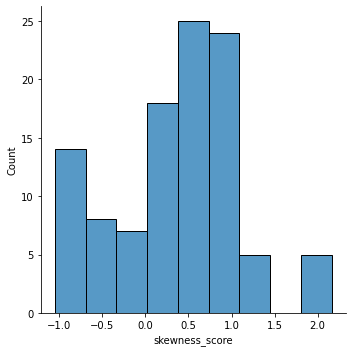

In [119]:
sns.displot(x=skewness_df['skewness_score'])
plt.show()

### Treating Skewness

**Performing Yoe-Johnson transformation as values contains negative values**

In [120]:
transformer = PowerTransformer(method='yeo-johnson')
transformer.fit(df[float_cols])
df_float_cols = pd.DataFrame(transformer.transform(df[float_cols]),columns=float_cols)

C:\Users\chaitanyamanem\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [121]:
post_skewness = []
for col in float_cols:
    post_skewness.append((col,df_float_cols[col].skew()))
        
post_skewness_df = pd.DataFrame(post_skewness,columns=['feature','skewness_score'])
post_skewness_df.sort_values(by='skewness_score',ascending=False,inplace=True)
post_skewness_df.head()

,feature,skewness_score
102,original_ngtdm_Coarseness,1.892875
105,original_ngtdm_Strength,0.631977
104,original_ngtdm_Contrast,0.333569
54,original_glcm_SumSquares,0.182093
34,original_glcm_ClusterTendency,0.178842


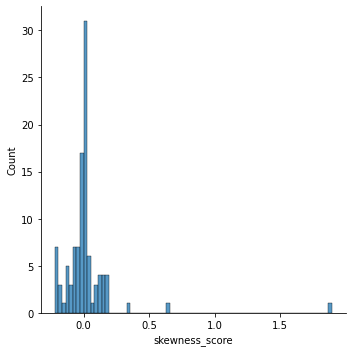

In [122]:
sns.displot(x=post_skewness_df['skewness_score'])
plt.show()

### Taking features only with in skewness range -0.5 to 0.5

In [123]:
transformed_float_cols = post_skewness_df[(post_skewness_df['skewness_score']>-0.5) & (post_skewness_df['skewness_score']<0.5)]['feature'].to_list()
df_float_cols = df_float_cols[transformed_float_cols]
df_float_cols.head()

,original_ngtdm_Contrast,original_glcm_SumSquares,original_glcm_ClusterTendency,original_glcm_ClusterProminence,original_gldm_LowGrayLevelEmphasis,original_gldm_GrayLevelVariance,original_glrlm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glcm_InverseVariance,original_glcm_DifferenceAverage,original_glcm_Contrast,original_ngtdm_Complexity,original_glszm_ZoneVariance,original_glcm_DifferenceVariance,original_glszm_ZonePercentage,original_glrlm_RunLengthNonUniformityNormalized,original_glcm_SumEntropy,original_glcm_JointEntropy,original_firstorder_Entropy,original_glszm_SizeZoneNonUniformityNormalized,original_firstorder_Variance,original_glcm_Imc2,original_glcm_ClusterShade,original_gldm_SmallDependenceEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_glszm_SmallAreaEmphasis,original_glrlm_RunPercentage,original_glrlm_LowGrayLevelRunEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glszm_SizeZoneNonUniformity,original_firstorder_Kurtosis,original_shape_SurfaceVolumeRatio,original_firstorder_MeanAbsoluteDeviation,original_firstorder_RobustMeanAbsoluteDeviation,original_glszm_LargeAreaEmphasis,original_firstorder_Skewness,original_gldm_DependenceNonUniformityNormalized,original_firstorder_Maximum,original_glcm_DifferenceEntropy,original_glszm_LargeAreaHighGrayLevelEmphasis,original_firstorder_10Percentile,original_firstorder_Range,original_glrlm_ShortRunHighGrayLevelEmphasis,original_firstorder_Mean,original_firstorder_RootMeanSquared,original_firstorder_Median,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glcm_Correlation,original_glcm_MCC,original_firstorder_90Percentile,original_firstorder_Minimum,original_glcm_Imc1,original_gldm_DependenceEntropy,original_glrlm_RunEntropy,original_firstorder_InterquartileRange,original_shape_MajorAxisLength,original_shape_MinorAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterColumn,original_glrlm_ShortRunEmphasis,original_shape_LeastAxisLength,original_shape_Maximum3DDiameter,original_shape_Maximum2DDiameterSlice,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LongRunEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_DependenceVariance,original_glrlm_RunVariance,original_shape_SurfaceArea,original_glrlm_LongRunHighGrayLevelEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_glrlm_RunLengthNonUniformity,original_glrlm_GrayLevelNonUniformity,original_shape_Flatness,original_glszm_GrayLevelNonUniformity,original_shape_MeshVolume,original_glrlm_HighGrayLevelRunEmphasis,original_gldm_GrayLevelNonUniformity,original_firstorder_TotalEnergy,original_firstorder_Energy,original_glszm_ZoneEntropy,original_shape_Sphericity,original_gldm_DependenceNonUniformity,original_shape_Elongation,original_glcm_Idmn,original_glcm_Idn,original_glcm_Idm,original_glcm_Id,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_GrayLevelNonUniformityNormalized,original_glcm_JointEnergy,original_glcm_Autocorrelation,original_glcm_JointAverage,original_glcm_SumAverage,original_firstorder_Uniformity,original_gldm_HighGrayLevelEmphasis,original_glcm_MaximumProbability,original_ngtdm_Busyness,original_glrlm_GrayLevelVariance
0,0.815584,0.394809,0.504747,1.693400,1.881015,1.797994,-1.312548,0.990509,0.997332,0.249831,0.249831,0.249831,2.139064,-0.013155,2.110280,-0.277370,1.457461,1.893302,1.931494,1.689474,-0.405175,-2.243220,1.378533,-1.785998,0.140494,0.829315,-0.308556,0.086117,-0.091224,1.809329,1.287389,0.118759,0.166203,0.361468,-1.236164,-2.520336,-2.449599,0.021062,1.604314,-1.866521,-2.205560,2.076385,0.017873,-1.104284,-1.546236,2.244434,0.224215,0.278809,0.172390,0.0,0.902403,0.837670,0.834537,0.240085,-0.428112,-0.460296,2.300923,-0.234121,-2.370339,-0.4

## Finding pointbiserialr correlation between continuous features and 'pCR (outcome)'

In [124]:
correlation = []

for col in list(df_float_cols.columns):
    correlation.append((col,abs(st.pointbiserialr(df['pCR (outcome)'],df_float_cols[col]).correlation)))



C:\Users\chaitanyamanem\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [125]:
float_cols_correlation_df = pd.DataFrame(correlation,columns=['feature','correlation'])
float_cols_correlation_df.sort_values(by='correlation',ascending=False,inplace=True)
float_cols_correlation_df.head(10)

,feature,correlation
29,original_glrlm_RunPercentage,0.164101
67,original_glrlm_LongRunLowGrayLevelEmphasis,0.154544
74,original_gldm_LargeDependenceHighGrayLevelEmph...,0.154237
16,original_glrlm_RunLengthNonUniformityNormalized,0.149406
75,original_gldm_LargeDependenceEmphasis,0.148486
57,original_glrlm_RunEntropy,0.148066
68,original_glrlm_LongRunEmphasis,0.141266
56,original_gldm_DependenceEntropy,0.138678
71,original_glrlm_RunVariance,0.136356
0,original_ngtdm_Contrast,0.135354


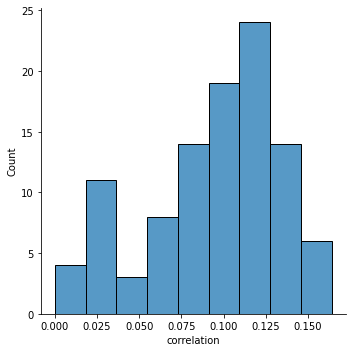

In [126]:
sns.displot(x=float_cols_correlation_df['correlation'])
plt.show()

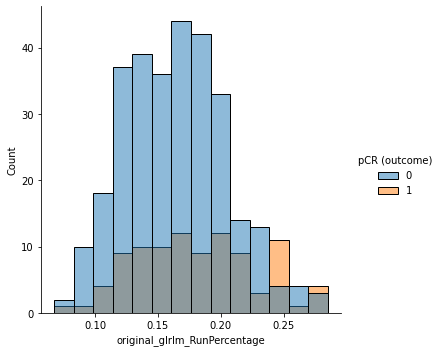

In [127]:
sns.displot(x=df['original_glrlm_RunPercentage'],hue=df['pCR (outcome)'])
plt.show()

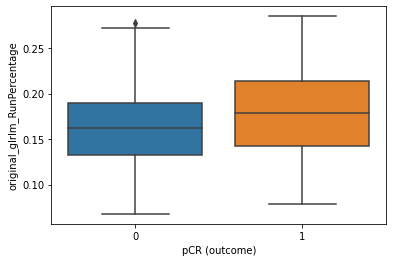

In [128]:
sns.boxplot(x=df['pCR (outcome)'], y=df['original_glrlm_RunPercentage'])
plt.show()

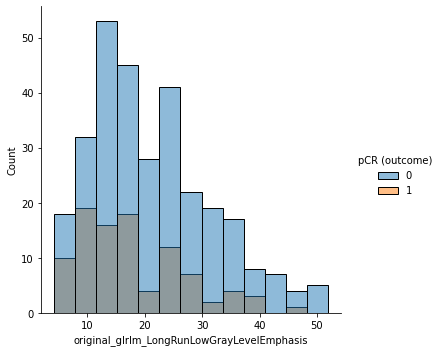

In [129]:
sns.displot(x=df['original_glrlm_LongRunLowGrayLevelEmphasis'],hue=df['pCR (outcome)'])
plt.show()

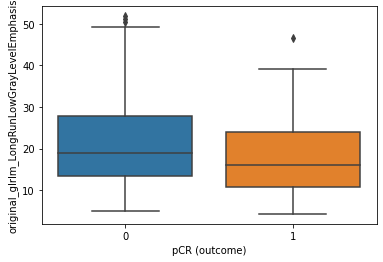

In [130]:

sns.boxplot(x=df['pCR (outcome)'], y=df['original_glrlm_LongRunLowGrayLevelEmphasis'])
plt.show()

### Selecting continuous features having correlation greater than 0.12

In [131]:
final_selected_float_cols = float_cols_correlation_df[abs(float_cols_correlation_df['correlation'])>0.12]['feature'].to_list()

final_continuous_features_df = df_float_cols[final_selected_float_cols]
final_continuous_features_df.head(3)

,original_glrlm_RunPercentage,original_glrlm_LongRunLowGrayLevelEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_glrlm_RunLengthNonUniformityNormalized,original_gldm_LargeDependenceEmphasis,original_glrlm_RunEntropy,original_glrlm_LongRunEmphasis,original_gldm_DependenceEntropy,original_glrlm_RunVariance,original_ngtdm_Contrast,original_firstorder_TotalEnergy,original_firstorder_Energy,original_glrlm_LongRunHighGrayLevelEmphasis,original_glcm_MaximumProbability,original_firstorder_10Percentile,original_firstorder_Uniformity,original_ngtdm_Complexity,original_gldm_GrayLevelVariance,original_shape_Maximum2DDiameterSlice,original_gldm_DependenceNonUniformity,original_shape_SurfaceArea,original_glcm_ClusterProminence,original_glcm_SumSquares,original_glrlm_GrayLevelNonUniformity,original_shape_MeshVolume,original_firstorder_Entropy
0,1.809329,-1.001900,-2.014558,1.457461,-1.830925,-0.234121,-1.143650,2.300923,-0.627258,0.815584,-1.822729,-1.822729,-1.041581,-0.378908,-1.104284,-1.813786,2.139064,1.797994,-0.384940,-0.752055,-0.153263,1.693400,0.394809,0.508749,0.244211,1.689474
1,-0.865203,0.827094,1.001130,-0.813269,0.905911,0.780899,0.939034,-0.988042,0.844573,-0.701162,0.254132,0.254132,0.982890,0.578373,0.708810,0.528056,-0.419685,-0.515554,-0.278365,0.515459,0.177768,-0.755105,-0.612923,0.052605,0.243604,-0.441471
2,-0.864054,0.642440,0.965911,-0.969414,0.864701,0.719790,0.754650,-0.850452,0.557812,-0.920492,-0.460947,-0.460947,0.800122,0.819227,0.653180,0.767834,-0.662098,-0.760606,0.069737,0.170217,-0.075719,-0.983948,-0.851830,-0.166883,-0.085127,-0.687221


In [132]:
final_continuous_features_df.shape

(395, 26)

### Merging categorical can continuous features

In [133]:
X = pd.concat([final_continuous_features_df.reset_index(),df[significant_categorical_cols].reset_index()],axis=1)
y = df['pCR (outcome)']
X.drop(columns=['index'],inplace=True)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

### Scaling the data

In [135]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

## Logistic Regression

In [136]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train,y_train)
y_predicted = lr.predict(X_test)

Accuracy: 0.758
Precission: 0.5
Recall: 0.083
f1_score: 0.143


Text(0.5, 24.0, 'Predicted label')

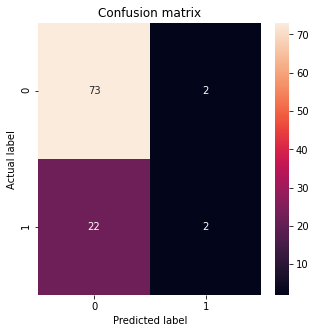

In [160]:
print(f"Accuracy: {round(accuracy_score(y_test,y_predicted),3)}")
#print(f"Confusion matrix: \n{confusion_matrix(y_test,y_predicted)}")
print(f"Precission: {round(precision_score(y_test,y_predicted),3)}")
print(f"Recall: {round(recall_score(y_test,y_predicted),3)}")
print(f"f1_score: {round(f1_score(y_test,y_predicted),3)}")

cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Weighted Logistic Regression

In [138]:
parameters = {
    'class_weight':[{0:1,1:1},{0:1.15,1:1},{0:1.25,1:1},{0:1,1:2.5},{0:1,1:5},{0:1,1:10},{0:1,1:30},{0:1,1:40},{0:1,1:50},
                    {0:1,1:70},{0:1,1:80},{0:1,1:100},
                    {0:5,1:1},{0:10,1:1},{0:30,1:1},{0:40,1:1},{0:50,1:1},
                    {0:70,1:1},{0:0.8,1:1},{0:0.5,1:0.5},
                    {0:0.6,1:0.5},{0:0.5,1:0.6},{0:0.4,1:0.7},{0:0.3,1:0.7}
                   ]
}
wlr = LogisticRegression(max_iter=300)

In [139]:
grid = GridSearchCV(wlr,parameters,scoring="recall", cv=5, n_jobs=3)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300), n_jobs=3,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1.15, 1: 1},
                                          {0: 1.25, 1: 1}, {0: 1, 1: 2.5},
                                          {0: 1, 1: 5}, {0: 1, 1: 10},
                                          {0: 1, 1: 30}, {0: 1, 1: 40},
                                          {0: 1, 1: 50}, {0: 1, 1: 70},
                                          {0: 1, 1: 80}, {0: 1, 1: 100},
                                          {0: 5, 1: 1}, {0: 10, 1: 1},
                                          {0: 30, 1: 1}, {0: 40, 1: 1},
                                          {0: 50, 1: 1}, {0: 70, 1: 1},
                                          {0: 0.8, 1: 1}, {0: 0.5, 1: 0.5},
                                          {0: 0.6, 1: 0.5}, {0: 0.5, 1: 0.6},
                                          {0: 0.4, 1: 0.7}, {0: 0.3, 1: 0.7}]},
             scoring='recall')

In [140]:
grid.best_params_

{'class_weight': {0: 1, 1: 30}}

In [141]:
grid.best_score_

0.959047619047619

In [142]:
wlr = LogisticRegression(class_weight={0: 1, 1: 100},max_iter=300)
wlr.fit(X_train,y_train)
y_predicted = wlr.predict(X_test)

In [143]:
print(f"Accuracy: {accuracy_score(y_test,y_predicted)}")
print(f"Confusion matrix: \n{confusion_matrix(y_test,y_predicted)}")
print(f"Precission: {precision_score(y_test,y_predicted)}")
print(f"Recall: {recall_score(y_test,y_predicted)}")
print(f"f1_score: {f1_score(y_test,y_predicted)}")

Accuracy: 0.36363636363636365
Confusion matrix: 
[[14 61]
 [ 2 22]]
Precission: 0.26506024096385544
Recall: 0.9166666666666666
f1_score: 0.411214953271028


In [144]:
test_prediction_probs = lr.predict_proba(X_test)
test_prediction_probs = test_prediction_probs[:,1]

In [145]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test,test_prediction_probs)

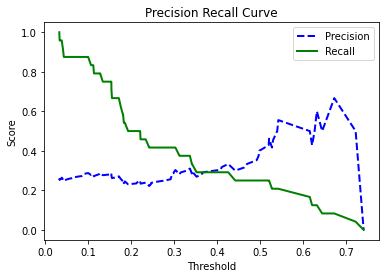

In [161]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
#plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
#[...]  # beautify the figure: add grid, legend, axis, labels, and circles
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title("Precision Recall Curve")
plt.legend()
plt.show()

In [147]:
threshold = 0.07
custom_test_prediction = np.where(test_prediction_probs>threshold,1,0)

Accuracy: 0.3939393939393939
Precission: 0.2692307692307692
Recall: 0.875
f1_score: 0.411764705882353


Text(0.5, 24.0, 'Predicted label')

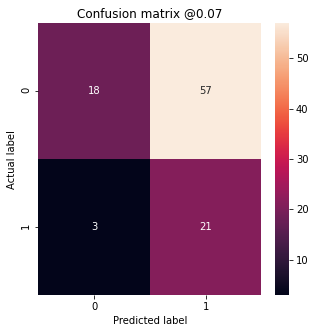

In [148]:
print(f"Accuracy: {accuracy_score(y_test,custom_test_prediction)}")
print(f"Precission: {precision_score(y_test,custom_test_prediction)}")
print(f"Recall: {recall_score(y_test,custom_test_prediction)}")
print(f"f1_score: {f1_score(y_test,custom_test_prediction)}")

#print(f"Confusion matrix: \n{confusion_matrix(y_test,custom_test_prediction)}")

cm = confusion_matrix(y_test,custom_test_prediction)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix @{:.2f}'.format(threshold))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### With SMOTE

In [164]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [165]:
X_res.shape, y_res.shape

((448, 33), (448,))

In [166]:
lrsmote = LogisticRegression(max_iter=300)
lrsmote.fit(X_res, y_res)
y_predicted = lrsmote.predict(X_test)


Accuracy: 0.535
Precission: 0.238
Recall: 0.417
f1_score: 0.303


Text(0.5, 24.0, 'Predicted label')

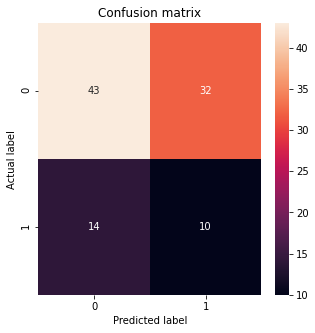

In [167]:
print(f"Accuracy: {round(accuracy_score(y_test,y_predicted),3)}")
print(f"Precission: {round(precision_score(y_test,y_predicted),3)}")
print(f"Recall: {round(recall_score(y_test,y_predicted),3)}")
print(f"f1_score: {round(f1_score(y_test,y_predicted),3)}")


cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
params ={'n_neighbors':[1,2,3,7,10,17,20,25,27,35,50]}
knn_grid = GridSearchCV(knn,params,scoring='accuracy',cv=3)
knn_grid.fit(X_train[['original_glrlm_RunPercentage','original_ngtdm_Contrast']],y_train)
knn_grid.best_estimator_.fit(X_train[['original_glrlm_RunPercentage','original_ngtdm_Contrast']],y_train)
print(knn_grid.best_params_)

{'n_neighbors': 20}


Accuracy: 0.7575757575757576
Precission: 0.5
Recall: 0.08333333333333333
f1_score: 0.14285714285714285


Text(0.5, 24.0, 'Predicted label')

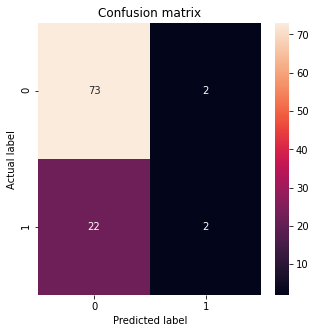

In [157]:
y_predicted = knn_grid.best_estimator_.predict(X_test[['original_glrlm_RunPercentage','original_ngtdm_Contrast']])
print(f"Accuracy: {accuracy_score(y_test,y_predicted)}")
#print(f"Confusion matrix: \n{confusion_matrix(y_test,y_predicted)}")
print(f"Precission: {precision_score(y_test,y_predicted)}")
print(f"Recall: {recall_score(y_test,y_predicted)}")
print(f"f1_score: {f1_score(y_test,y_predicted)}")


cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### RandomForest

In [168]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_predicted = rfc.predict(X_test)


In [169]:
print(f"Accuracy: {accuracy_score(y_test,y_predicted)}")
print(f"Confusion matrix: \n{confusion_matrix(y_test,y_predicted)}")
print(f"Precission: {precision_score(y_test,y_predicted)}")
print(f"Recall: {recall_score(y_test,y_predicted)}")
print(f"f1_score: {f1_score(y_test,y_predicted)}")

Accuracy: 0.7171717171717171
Confusion matrix: 
[[68  7]
 [21  3]]
Precission: 0.3
Recall: 0.125
f1_score: 0.17647058823529413


### Hyperparameter Tuning

In [170]:
params={
    'criterion':['entropy', 'gini'],
    'splitter':['random', 'best'], 
    'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
    'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
    'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
    'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
    'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
    'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
    'max_depth':[None, 2,4,6,8],
    'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
}

In [171]:
params={
    'criterion':['entropy', 'gini'],
    'n_estimators':[70,100,200,300],
    'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
    'min_samples_split':[2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1],
    'min_samples_leaf':[1,2,4,6,8,10,20,30],
    'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None], 
    'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
    'max_depth':[None,2,4,6,8,10,20],
    'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
}

In [172]:
rfc = RandomForestClassifier(n_estimators=300)
rs = RandomizedSearchCV(rfc,params,scoring='accuracy',cv=3,n_jobs=3,n_iter=100)
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=300),
                   n_iter=100, n_jobs=3,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 20],
                                        'max_features': ['auto', 0.8, 0.7, 0.6,
                                                         0.5, 0.4],
                                        'max_leaf_nodes': [10, 15, 20, 25, 30,
                                                           35, 40, 45, 50,
                                                           None],
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.05, 0.1,
                                                                  0.15, 0.2],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                               

In [173]:
rs.best_params_

{'n_estimators': 70,
 'min_weight_fraction_leaf': 0.005,
 'min_samples_split': 0.06,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': 10,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'entropy'}

In [174]:
rs.best_score_

0.7601869030440459

Accuracy: 0.778
Precission: 0.667
Recall: 0.167
f1_score: 0.267


Text(0.5, 24.0, 'Predicted label')

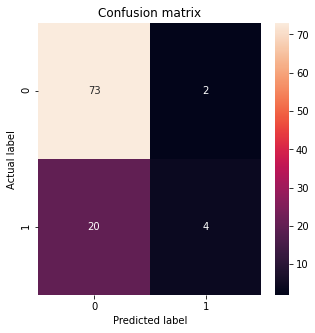

In [175]:
rs.best_estimator_.fit(X_train,y_train)
y_predicted = rs.best_estimator_.predict(X_test)
print(f"Accuracy: {round(accuracy_score(y_test,y_predicted),3)}")
#print(f"Confusion matrix: \n{confusion_matrix(y_test,y_predicted)}")
print(f"Precission: {round(precision_score(y_test,y_predicted),3)}")
print(f"Recall: {round(recall_score(y_test,y_predicted),3)}")
print(f"f1_score: {round(f1_score(y_test,y_predicted),3)}")


cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingClassifier


In [107]:
gbc = GradientBoostingClassifier()
params={
    'max_depth':[1,2,3],
    'subsample':[0.5,0.7,0.8],
    'n_estimators':[50,100,300,500],
    'learning_rate':[0.001,0.005,0.01,0.05, 0.1,]
}

In [108]:
rand_gbc = RandomizedSearchCV(gbc, params, n_iter=20, scoring='accuracy', 
                              cv=5, n_jobs=3, random_state=2)
rand_gbc.fit(X_train,y_train)
rand_gbc.best_params_

{'subsample': 0.5, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.001}

In [109]:
rand_gbc.best_score_

0.7567796610169492

In [110]:
rand_gbc.best_estimator_.fit(X_train,y_train)
y_predicted = rand_gbc.best_estimator_.predict (X_test)
print(f"Accuracy: {accuracy_score(y_test,y_predicted)}")
print(f"Confusion matrix: \n{confusion_matrix(y_test,y_predicted)}")
print(f"Precission: {precision_score(y_test,y_predicted)}")
print(f"Recall: {recall_score(y_test,y_predicted)}")
print(f"f1_score: {f1_score(y_test,y_predicted)}")

Accuracy: 0.7575757575757576
Confusion matrix: 
[[75  0]
 [24  0]]
Precission: 0.0
Recall: 0.0
f1_score: 0.0


C:\Users\chaitanyamanem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVC

In [168]:
from sklearn.svm import SVC

In [182]:
svc = SVC(kernel='poly',degree=3)

In [183]:
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [184]:
y_predicted = svc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_predicted)}")
print(f"Confusion matrix: \n{confusion_matrix(y_test,y_predicted)}")
print(f"Precission: {precision_score(y_test,y_predicted)}")
print(f"Recall: {recall_score(y_test,y_predicted)}")
print(f"f1_score: {f1_score(y_test,y_predicted)}")

Accuracy: 0.7575757575757576
Confusion matrix: 
[[72  3]
 [21  3]]
Precission: 0.5
Recall: 0.125
f1_score: 0.2


### NN

In [368]:
import tensorflow as tf


In [455]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [456]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [457]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                640       
                                                                 
 dense_43 (Dense)            (None, 64)                2112      
                                                                 
 dense_44 (Dense)            (None, 128)               8320      
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 1)                 33        
                                                                 
Total params: 21,441
Trainable params: 21,441
Non-trai

In [458]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_accuracy",  
        mode='max',        
        patience=5,
        verbose=1,
        restore_best_weights=True
    )]

In [459]:
history = model.fit(X_res, y_res,epochs=20,validation_data=(X_test,y_test),callbacks=callbacks,)

Epoch 1/20
14/14 [==============================] - 1s 34ms/step - loss: 0.6874 - accuracy: 0.6049 - val_loss: 0.6998 - val_accuracy: 0.5758
Epoch 2/20
14/14 [==============================] - 0s 12ms/step - loss: 0.6094 - accuracy: 0.6652 - val_loss: 0.7330 - val_accuracy: 0.5556
Epoch 3/20
14/14 [==============================] - 0s 12ms/step - loss: 0.6101 - accuracy: 0.6830 - val_loss: 0.7430 - val_accuracy: 0.5455
Epoch 4/20
14/14 [==============================] - 0s 13ms/step - loss: 0.6152 - accuracy: 0.6719 - val_loss: 0.6791 - val_accuracy: 0.5960
Epoch 5/20
14/14 [==============================] - 0s 12ms/step - loss: 0.6129 - accuracy: 0.6696 - val_loss: 0.6852 - val_accuracy: 0.5758
Epoch 6/20
14/14 [==============================] - 0s 12ms/step - loss: 0.6059 - accuracy: 0.6920 - val_loss: 0.7118 - val_accuracy: 0.6061
Epoch 7/20
14/14 [==============================] - 0s 10ms/step - loss: 0.6045 - accuracy: 0.6808 - val_loss: 0.7442 - val_accuracy: 0.5758
Epoch 8/20
14

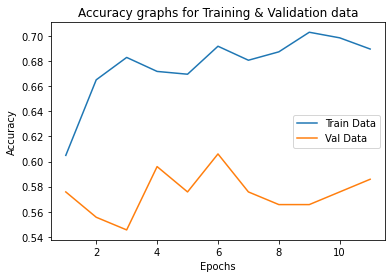

In [460]:
sns.lineplot(x=list(range(1,11+1)),y=history.history['accuracy'],palette = 'blue', label = 'Train Data')
sns.lineplot(x=list(range(1,11+1)),y=history.history['val_accuracy'],palette = 'orange', label = 'Val Data')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy graphs for Training & Validation data")
#plt.legend()
plt.show()


In [469]:
y_predicted = model.predict(X_test)
y_predicted = np.where(y_predicted[:,0]>0.8,1,0)

4/4 [==============================] - 0s 6ms/step


In [470]:

print(f"Accuracy: {accuracy_score(y_test,y_predicted)}")
print(f"Confusion matrix: \n{confusion_matrix(y_test,y_predicted)}")
print(f"Precission: {precision_score(y_test,y_predicted)}")
print(f"Recall: {recall_score(y_test,y_predicted)}")
print(f"f1_score: {f1_score(y_test,y_predicted)}")

Accuracy: 0.7474747474747475
Confusion matrix: 
[[73  2]
 [23  1]]
Precission: 0.3333333333333333
Recall: 0.041666666666666664
f1_score: 0.07407407407407407


# -------END-----------

In [118]:
df_float_cols[final_selected_float_cols].corr()['original_glrlm_RunPercentage']

original_glrlm_RunPercentage                          1.000000
original_glrlm_LongRunLowGrayLevelEmphasis           -0.843449
original_gldm_LargeDependenceHighGrayLevelEmphasis   -0.913308
original_glrlm_RunLengthNonUniformityNormalized       0.756738
original_gldm_LargeDependenceEmphasis                -0.979207
original_glrlm_RunEntropy                            -0.800861
original_glrlm_LongRunEmphasis                       -0.857987
original_gldm_DependenceEntropy                       0.877261
original_glrlm_RunVariance                           -0.734592
original_ngtdm_Contrast                               0.474834
original_firstorder_TotalEnergy                      -0.407315
original_firstorder_Energy                           -0.407315
original_glrlm_LongRunHighGrayLevelEmphasis          -0.773533
original_glcm_MaximumProbability                     -0.459078
original_firstorder_10Percentile                     -0.376308
Name: original_glrlm_RunPercentage, dtype: float64

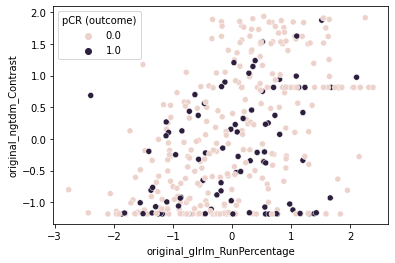

In [119]:
sns.scatterplot(x=final_continuous_features_df['original_glrlm_RunPercentage'],
                y=final_continuous_features_df['original_ngtdm_Contrast'],
                hue=df['pCR (outcome)']
               )
plt.show()

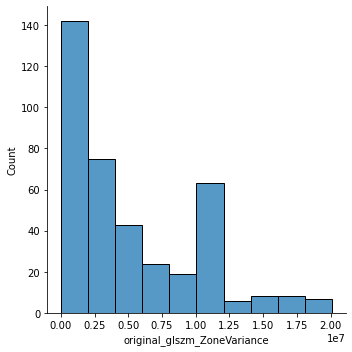

In [87]:
sns.displot(x=df['original_glszm_ZoneVariance'])
plt.show()

In [90]:
df['original_glszm_ZoneVariance']

0.0

In [ ]:
for col in significant_float_cols:
    sns.boxplot(x=df[col])
    plt.show()

In [41]:
f_classif(df['original_shape_Elongation'].to_numpy().reshape(-1, 1),df['pCR (outcome)'])

(array([0.48757808]), array([0.48542262]))

In [40]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df[df['pCR (outcome)']==0]['original_shape_Elongation'],
                                df[df['pCR (outcome)']==1]['original_shape_Elongation'])
fvalue, pvalue

(0.4875780814958421, 0.48542261644145446)

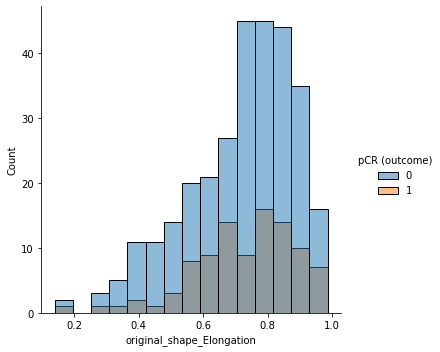

In [35]:
sns.displot(x=df['original_shape_Elongation'],hue=df['pCR (outcome)'])

### PgR

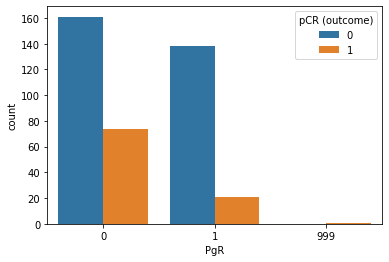

In [44]:
sns.countplot(x=df['PgR'],hue=df['pCR (outcome)'])
plt.show()

In [45]:
X = df.drop(columns=['ID','pCR (outcome)','RelapseFreeSurvival (outcome)'])
y = df['pCR (outcome)']

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X,y)


RandomForestClassifier()

In [47]:
feature_importance = pd.DataFrame(zip(list(X.columns),rfc.feature_importances_*100),columns=['feature_name','importance'])
feature_importance.sort_values(by='importance',ascending=False,inplace=True)
feature_importance.head(10)

,feature_name,importance
106,original_glszm_SmallAreaEmphasis,2.409813
108,original_glszm_SmallAreaLowGrayLevelEmphasis,1.852151
107,original_glszm_SmallAreaHighGrayLevelEmphasis,1.605093
105,original_glszm_SizeZoneNonUniformityNormalized,1.531067
35,original_firstorder_Range,1.468985
30,original_firstorder_Maximum,1.415788
90,original_glrlm_RunLengthNonUniformityNormalized,1.348844
15,original_shape_Maximum2DDiameterRow,1.288614
11,original_shape_Flatness,1.287707
38,original_firstorder_Skewness,1.277016


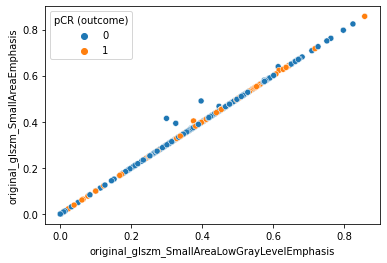

In [48]:
sns.scatterplot(x=df['original_glszm_SmallAreaLowGrayLevelEmphasis'],
                y=df['original_glszm_SmallAreaEmphasis'],
                hue=y)
plt.show()

In [ ]:
sns.displot(data=df, x= 'original_glszm_SmallAreaLowGrayLevelEmphasis')
plt.show()
print(df['original_glszm_SmallAreaLowGrayLevelEmphasis'].skew())

In [ ]:
sns.displot(data=df, x= 'original_glszm_SmallAreaEmphasis')
plt.show()
print(df['original_glszm_SmallAreaEmphasis'].skew())

In [ ]:
sns.displot(data=df, x= 'original_glszm_SmallAreaHighGrayLevelEmphasis')
plt.show()
print(df['original_glszm_SmallAreaHighGrayLevelEmphasis'].skew())

In [ ]:
sns.displot(data=df, x= 'original_glrlm_RunPercentage')
plt.show()
print(df['original_glrlm_RunPercentage'].skew())

In [ ]:
sns.countplot(x=df['HER2'],hue=df['pCR (outcome)'])
plt.title('HER2 vs pCR')
plt.show()

In [49]:
X = X[['ER','PgR','HER2','LNStatus']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [50]:
parameters = {
    'class_weight':[{0:1,1:1},{0:1,1:5},{0:1,1:10},{0:1,1:30},{0:1,1:40},{0:1,1:50},
                    {0:1,1:70},{0:1,1:80},{0:1,1:100},
                    {0:5,1:1},{0:10,1:1},{0:30,1:1},{0:40,1:1},{0:50,1:1},
                    {0:70,1:1},{0:80,1:1},{0:100,1:1}
                   ]
}
lr = LogisticRegression()

In [51]:
grid = GridSearchCV(lr,parameters,scoring="recall", cv=5, n_jobs=3)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 5},
                                          {0: 1, 1: 10}, {0: 1, 1: 30},
                                          {0: 1, 1: 40}, {0: 1, 1: 50},
                                          {0: 1, 1: 70}, {0: 1, 1: 80},
                                          {0: 1, 1: 100}, {0: 5, 1: 1},
                                          {0: 10, 1: 1}, {0: 30, 1: 1},
                                          {0: 40, 1: 1}, {0: 50, 1: 1},
                                          {0: 70, 1: 1}, {0: 80, 1: 1},
                                          {0: 100, 1: 1}]},
             scoring='recall')

In [52]:
grid.best_params_

{'class_weight': {0: 1, 1: 30}}

In [53]:
grid.best_score_

0.9733333333333334

In [54]:
grid.best_estimator_.fit(X_train,y_train)
y_predicted = grid.best_estimator_.predict(X_test)
accuracy_score(y_test,y_predicted)

0.41414141414141414

In [55]:
confusion_matrix(y_test,y_predicted)

array([[21, 54],
       [ 4, 20]], dtype=int64)

In [56]:
f1_score(y_test,y_predicted)

0.4081632653061225

In [57]:
recall_score(y_test,y_predicted)

0.8333333333333334

In [58]:
precision_score(y_test,y_predicted)

0.2702702702702703

In [258]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=list(X_train.columns))
X_test = pd.DataFrame(scaler.transform(X_test),columns=list(X_test.columns))

In [259]:
X_train.shape,X_test.shape

((296, 10), (99, 10))

In [90]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

## Logistic Regression

In [91]:
lr_smote = LogisticRegression()
lr_smote.fit(X_res, y_res)


LogisticRegression()

In [93]:
y_predicted = lr_smote.predict(X_test)
accuracy_score(y_test,y_predicted)

0.5656565656565656

In [94]:
confusion_matrix(y_test,y_predicted)

array([[41, 34],
       [ 9, 15]], dtype=int64)

In [271]:
rfc = RandomForestClassifier()
cross_val_score(rfc,X_res, y_res,cv=5,scoring='accuracy').mean()

0.8238951310861424

In [272]:
rfc.fit(X_res, y_res)
y_predicted = rfc.predict(X_test)
accuracy_score(y_test,y_predicted)

0.6767676767676768

In [273]:
confusion_matrix(y_test,y_predicted)

array([[56, 19],
       [13, 11]], dtype=int64)

In [45]:
print(f"Accuracy: {accuracy_score(y_test['pCR (outcome)'],y_predcited)}")
print(f"Precision: {precision_score(y_test['pCR (outcome)'],y_predcited)}")
print(f"Recall: {recall_score(y_test['pCR (outcome)'],y_predcited)}")
print(f"F1 Score: {f1_score(y_test['pCR (outcome)'],y_predcited)}")


Accuracy: 0.725
Precision: 0.375
Recall: 0.15
F1 Score: 0.21428571428571425


## SVC

In [46]:
svc = SVC()
svc.fit(X_train,y_train['pCR (outcome)'])
y_predcited = svc.predict(X_test)

In [47]:
print(f"Accuracy: {accuracy_score(y_test['pCR (outcome)'],y_predcited)}")
print(f"Precision: {precision_score(y_test['pCR (outcome)'],y_predcited,)}")
print(f"Recall: {recall_score(y_test['pCR (outcome)'],y_predcited)}")
print(f"F1 Score: {f1_score(y_test['pCR (outcome)'],y_predcited)}")

Accuracy: 0.75
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\chaitanyamanem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random forest classifier

In [56]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train['pCR (outcome)'])
y_predcited = rfc.predict(X_test)

In [57]:
print(f"Accuracy: {accuracy_score(y_test['pCR (outcome)'],y_predcited)}")
print(f"Precision: {precision_score(y_test['pCR (outcome)'],y_predcited)}")
print(f"Recall: {recall_score(y_test['pCR (outcome)'],y_predcited)}")
print(f"F1 Score: {f1_score(y_test['pCR (outcome)'],y_predcited)}")

Accuracy: 0.7125
Precision: 0.4
Recall: 0.3
F1 Score: 0.34285714285714286


## Linear Regression

In [48]:
lir = LinearRegression()
lir.fit(X_train,y_train['RelapseFreeSurvival (outcome)'])
y_predcited = lir.predict(X_test)

In [55]:
print(f" mean absolute error: {mean_absolute_error(y_test['RelapseFreeSurvival (outcome)'],y_predcited)}")

 mean absolute error: 23.333999365756664


In [52]:
y_test['RelapseFreeSurvival (outcome)'].describe()

count     80.000000
mean      60.714583
std       29.020107
min       10.000000
25%       39.000000
50%       57.916667
75%       84.250000
max      144.000000
Name: RelapseFreeSurvival (outcome), dtype: float64